<figure>
    <a href="http://www.upm.es">
    <img style="float: right;" src="img/UPMLogo.png" width="100">
    </a>
</figure>

# Balances de Materia con Python

#### © **[Jorge Ramírez](http://blogs.upm.es/compsoftmatter/)**, **[Universidad Politécnica de Madrid](http://www.upm.es)**, 2019

<img style="float: right;" src="img/balance.jpg" width="400">

Los balances de materia en procesos químicos se pueden **expresar, analizar y resolver** fácilmente mediante **sistemas de ecuaciones algebraicas lineales**. El trabajo de traducir los datos del problema en ecuaciones algebraicas con los coeficientes correctos puede resultar **tedioso** y su solución puede dar lugar a **errores de cálculo**. Los sistemas de cálculo algebraico simbólico pueden ser muy útiles en este ámbito. 

En este ejercicio, se muestra mediante ejemplos cómo **resolver un problema balance de materia** en procesos con **una o varias etapas**, **con y sin reacción química** (típicos de un curso introductorio de Ingeniería Química), utilizando la librería **Sympy**.

## Balance en una unidad de mezcla - Dilución de NaOH

### Enunciado

Se desea preparar una disolución acuosa de NaOH (8% en masa) diluyendo una disolución al 20% en masa con agua pura. Calcular cuántos litros de $\mathrm{H}_2\mathrm{O}$ son necesarios y cuántos kg de disolución deseada son producidos por cada kg de la corriente de sosa de alimentación. 

**Ejemplo 4.3-3 R.M. Felder, Elementary Principles of Chemical Processes, 3rd Edition**

### Base de Cálculo, diagrama de flujo y ecuaciones de balance

Elegimos una base de cálculo (100 kg de la disolución de alimentación al 20% en masa de NaOH). El diagrama de flujo con la información conocida y las incógnitas es:

<img src="img/FlowChart1_Mixer.png" width="400">


Podemos escribir 3 ecuaciones de balance (una global y otra por cada una de las 2 sustancias que participan NaOH y $H_2O$). Solo dos de ellas serán independientes, elegimos escribir las ecuaciones de balance global y una en NaOH:
$$ \mathrm{GLOBAL}: 100 + m_1 = m_2 $$
$$ \mathrm{NaOH}: 100 \cdot 0.2 = m_2 \cdot 0.08 $$

El sistema de ecuaciones es trivial, pero sirve de ejemplo para ilustrar cómo expresar un problema utilizando sympy.

### Expresar el problema en Sympy
Primero, importamos la libraría **sympy**. Necesitamos definir las variables simbólicas utilizando la función **var**:

In [1]:
import sympy as sym
sym.init_printing()
m1, m2 = sym.var('m1 m2')

Después, definimos las ecuaciones que deseamos resolver utilizando la función **Eq**:

In [3]:
EqGlobal=sym.Eq(100+m1-m2)
EqNaOH=sym.Eq(100*0.2-m2*0.08)
display(EqGlobal)
display(EqNaOH)

Finalmente, resolvemos el sistema de ecuaciones utilizando la función **solve** de **sympy**.

In [4]:
soln = sym.solve([EqGlobal, EqNaOH])
for k in soln.keys():
    print("Variable {0:4s}:  {1:8.2f}".format(str(k),soln[k]))

Variable m1  :    150.00
Variable m2  :    250.00


Las respuestas a las preguntas planteadas son:

In [5]:
sol1 = m1/100
sol2 = m2/100
print("Se necesitan {:8.2f} L de agua por cada kg de alimentación".format(round(soln[m1],2)))
print("Se producen {:8.2f} kg de disolución de NaOH al 0.08% por cada kg de alimentación".format(round(soln[m2],2)))

Se necesitan   150.00 L de agua por cada kg de alimentación
Se producen   250.00 kg de disolución de NaOH al 0.08% por cada kg de alimentación


## Balance en un reactor - Combustión Incompleta de Metano

### Enunciado

Se quema metano con aire en un reactor de combustión para dar una mezcla de monóxido de carbono, dióxido de carbono y agua. Las reacciones que tienen lugar son:
$$ \mathrm{CH}_4 + \frac{3}{2}\mathrm{O}_2 \to \mathrm{CO} + 2\mathrm{H_2O} $$
$$ \mathrm{CH}_4 + 2\mathrm{O}_2 \to \mathrm{CO_2} + 2\mathrm{H_2O} $$
La alimentación al reactor contiene 7.8% $\mathrm{CH_4}$, 19.4% $\mathrm{O_2}$ y 72.8% $\mathrm{N_2}$ (composición molar). La conversión de metano es del 90% y el gas de salida contiene 8 moles de $\mathrm{CO_2}$ por cada mol de $\mathrm{CO}$. Se pide:

a) Realice un análisis de grados de libertad del proceso.

b) Calcule la composición molar de la corriente de salida.

**Ejemplo 4.7-1 R.M. Felder, Elementary Principles of Chemical Processes, 3rd Edition**

### Base de cálculo y diagrama de flujo

Tomamos como base de cálculo 100 mol de la corriente de alimentación del reactor. En este ejemplo, vamos a aplicar un tratamiento más general que nos será de utilidad en casos en los que aparezca más de una unidad en el proceso. 

Para simplificar la notación, denominamos a las sustancias con los siguientes códigos: 

- M = $\mathrm{CH_4}$
- O = $\mathrm{O_2}$
- N = $\mathrm{N_2}$
- MON = $\mathrm{CO}$
- D = $\mathrm{CO_2}$
- H = $\mathrm{H_2}$

El diagrama de flujo que incorpora toda la información del problema es:

<img src="img/FlowChart2_Reactor.png" width="400">

### Declaración de variables

Tenemos dos corrientes en el problema (aunque conocemos toda la información de una de ellas). Creamos las variables de cada corriente utilizando la función **var** y las almacenamos en una lista.

In [6]:
stream1=sym.var('nM1 nO1 nN1')
stream2=sym.var('nM2 nO2 nN2 nMON2 nD2 nH2')
stream_table=[]
stream_table.append(stream1)
stream_table.append(stream2)
display(stream_table)

Cuando hay reacciones, el avance de cada reacción es una nueva variable. En el reactor tienen lugar dos reacciones. Le asignamos la variable $X_{MON}$ al avance de la primera reacción (la que da lugar al monóxido) y $X_{D}$ al avance de la segunda reacción (la que da lugar al dióxido).

In [7]:
extents=sym.var('XMON XD')
display(extents)

Agrupamos todas las variables en una lista:

In [8]:
variables=[]
for x in extents:
    variables.append(x)
for s in stream_table:
    for x in s:
        variables.append(x)
print(variables)

[XMON, XD, nM1, nO1, nN1, nM2, nO2, nN2, nMON2, nD2, nH2]


### Declaración de ecuaciones

Las ecuaciones que relacionan las variables de las corrientes 1 y 2 están determinadas por la estequiometría de las reacciones que tienen lugar en el Reactor. Las ecuaciones son:

$$ n_{M}^2 = n_{M}^1 - X_{MON} - X_D $$
$$ n_O^2 = n_O^1 - \frac{3}{2} X_{MON} - 2 X_D $$
$$ n_{MON}^2 = X_{MON} $$
$$ n_D^2 = X_D $$
$$ n_H^2 = 2 X_{MON} + 2 X_D $$
$$ n_N^2 = n_N^1 $$ 

La última ecuación expresa el hecho de que el nitrógeno no participa en la reacción. Declaramos dichas ecuaciones utilizando la función **Eq**:

In [9]:
reactor = [
    sym.Eq(nM2 - nM1 + XMON + XD),
    sym.Eq(nO2 - nO1 + 3/2*XMON + 2*XD),
    sym.Eq(nMON2 - XMON),
    sym.Eq(nD2 - XD),
    sym.Eq(nH2 - 2*XMON - 2*XD),
    sym.Eq(nN2 - nN1)
]
for eqn in reactor:
    display(eqn)

### Declaración de especificaciones

Las especificaciones del problema se refieren a la composición de la corriente de entrada (corriente 1), la conversión de metano en el reactor y a la relación entre los moles de monóxido y dióxido de carbono en la corriente de salida (corriente 2). Dichas especificaciones también se pueden escribir utilizando el comando **Eq**:

In [10]:
stream1_spec = [
    sym.Eq(nM1, 7.8),
    sym.Eq(nO1, 19.4),
    sym.Eq(nN1, 72.8)
]
stream2_spec = [
    sym.Eq(nM2 - 0.1*nM1),
    sym.Eq(nD2 - 8*nMON2)
]
specifications = stream1_spec + stream2_spec
for eqn in specifications:
    display(eqn)

### Análisis de grados de libertad

Un análisis de grados de libertad nos permite comparar el número de variables al número de ecuaciones.

In [11]:
print("***************************")
print("*** TABLA DE CORRIENTES ***")
print("***************************")
nVars = 0
nStreams = 1
for s in stream_table:
    print("\nCorriente %d\n"%nStreams)
    nStreams += 1
    for v in s:
        nVars += 1
        print("\tVariable: {:5s}".format(v.name))
print("\n%d Variables en %d corrientes\n" % (nVars, len(stream_table)))

print("***************************")
print("*** TABLA DE REACCIONES ***")
print("***************************")

print("\n%d Avances de Reacción\n" % len(extents))
for v in extents:
    print("\tAvance: ", v.name)

print("\n*****************************")
print("*** Nº TOTAL DE VARIABLES ***")
print("*****************************")
print("\n%d Variables = %d Variables de Corriente + %d Avances de Reacción \n" \
    % (len(variables),nVars,len(extents)))


***************************
*** TABLA DE CORRIENTES ***
***************************

Corriente 1

	Variable: nM1  
	Variable: nO1  
	Variable: nN1  

Corriente 2

	Variable: nM2  
	Variable: nO2  
	Variable: nN2  
	Variable: nMON2
	Variable: nD2  
	Variable: nH2  

9 Variables en 2 corrientes

***************************
*** TABLA DE REACCIONES ***
***************************

2 Avances de Reacción

	Avance:  XMON
	Avance:  XD

*****************************
*** Nº TOTAL DE VARIABLES ***
*****************************

11 Variables = 9 Variables de Corriente + 2 Avances de Reacción 



In [36]:
equations = reactor + specifications
print("\n%d Ecuaciones = %d Balances de Materia + %d Especificaciones" \
    % (len(equations),len(reactor),len(specifications)))

print("\n%d Balances de Materia\n" % len(reactor))
for mb in reactor:
    display(mb)

print("\n\n%d Especificaciones\n" % len(specifications))
for spec in specifications:
    display(spec)


11 Ecuaciones = 6 Balances de Materia + 5 Especificaciones

6 Balances de Materia





5 Especificaciones



Si el número de variables se corresponde al número de ecuaciones, entonces el sistema tiene 0 grados de libertad (**el problema está bien especificado**).

### Solución

In [37]:
soln = sym.solve(reactor + specifications)

for k in soln.keys():
    print("Variable {0:4s}:  {1:8.2f}".format(str(k),round(soln[k],2)))

Variable XD  :      6.24
Variable XMON:      0.78
Variable nD2 :      6.24
Variable nH2 :     14.04
Variable nM1 :      7.80
Variable nM2 :      0.78
Variable nMON2:      0.78
Variable nN1 :     72.80
Variable nN2 :     72.80
Variable nO1 :     19.40
Variable nO2 :      5.75


La composición del gas de salida estará dada por:

In [38]:
nTOTAL=soln[nM2]+soln[nO2]+soln[nN2]+soln[nMON2]+soln[nD2]+soln[nH2]
print('Composición del gas de salida:')
print('Metano {:8.2f}%'.format(soln[nM2]/nTOTAL*100))
print('Oxígeno {:8.2f}%'.format(soln[nO2]/nTOTAL*100))
print('Nitrógeno {:8.2f}%'.format(soln[nN2]/nTOTAL*100))
print('Monóxido de Carbono {:8.2f}%'.format(soln[nMON2]/nTOTAL*100))
print('Dióxido de Carbono {:8.2f}%'.format(soln[nD2]/nTOTAL*100))
print('Agua {:8.2f}%'.format(soln[nH2]/nTOTAL*100))

Composición del gas de salida:
Metano     0.78%
Oxígeno     5.73%
Nitrógeno    72.52%
Monóxido de Carbono     0.78%
Dióxido de Carbono     6.22%
Agua    13.99%


## Balance en varios equipos con reacción, reciclado y purga - Síntesis de Metanol

### Enunciado

El metanol se produce mediante reacción de dióxido de carbono e hidrógeno:

$$ \mathrm{CO_2} + 3\mathrm{H_2} \to \mathrm{CH_3OH} + \mathrm{H_2O} $$

La alimentación fresca del proceso contiene hidrógeno, dióxido de carbono y 0.4% molar de inertes (I). El efluente del reactor entra en un condensador que elimina todo el metanol y el agua formados pero ninguno de los reactivos o inertes. Estos últimos se recirculan al reactor. Para evitar la acumulación de inertes en el sistema, se elimina una corriente de purga de la corriente de reciclado. 

La corriente que entra en el reactor (suma de las corrientes de alimentación fresca y la de reciclo) contiene 28% $\mathrm{CO_2}$, 70% $\mathrm{H_2}$ y 2% de inertes (composición molar). La conversión de hidrógeno en cada pasada por el reactor es del 60%. Calcular:

- Los caudales molares y composición molar de la corriente de alimentación fresca, la corriente que entra en el reactor, la corriente de recirculación y la corriente de purga para una producción de 155 kmol/h de $\mathrm{CH_3OH}$.

**Ejemplo 4.7-3 R.M. Felder, Elementary Principles of Chemical Processes, 3rd Edition**

### Base de cálculo y diagrama de flujo

Como regla general, eligiremos como base de cálculo aquella corriente de la que dispongamos de más información. En este caso, se trata de la corriente que entra en el reactor. Para simplificar la notación, denominamos D=$\mathrm{CO_2}$, H=$\mathrm{H_2}$, M=$\mathrm{CH_3OH}$, A=$\mathrm{H_2O}$ e I=Inertes.

<img src="img/FlowChart3_Methanol.png" width="600">

### Declaración de variables

In [90]:
stream1=sym.var('nD1 nH1 nI1')
stream2=sym.var('nD2 nH2 nI2')
stream3=sym.var('nD3 nH3 nI3 nM3 nA3')
stream4=sym.var('nM4 nA4')
stream5=sym.var('nD5 nH5 nI5')
stream6=sym.var('nD6 nH6 nI6')
stream7=sym.var('nD7 nH7 nI7')
stream_table=[]
stream_table.append(stream1)
stream_table.append(stream2)
stream_table.append(stream3)
stream_table.append(stream4)
stream_table.append(stream5)
stream_table.append(stream6)
stream_table.append(stream7)
display(stream_table)

extents=[sym.var('X')]
display(extents)

print("alpha = Cantidad de la corriente 5 que se va a la purga")
split=[sym.var('alpha')]
display(split)

variables=[]
for x in extents:
    variables.append(x)
for x in split:
    variables.append(x)
for s in stream_table:
    for x in s:
        variables.append(x)
print(variables)

alpha = Cantidad de la corriente 5 que se va a la purga


[X, alpha, nD1, nH1, nI1, nD2, nH2, nI2, nD3, nH3, nI3, nM3, nA3, nM4, nA4, nD5, nH5, nI5, nD6, nH6, nI6, nD7, nH7, nI7]


### Declaración de ecuaciones

Definimos las ecuaciones de balance de materia para cada equipo del proceso, más los puntos donde se retira la purga y el punto donde se mezclan las corrientes de alimentación fresca y la de recirculación.

In [91]:
mix = [
    sym.Eq(nD2-nD1-nD7),
    sym.Eq(nH2-nH1-nH7),
    sym.Eq(nI2-nI1-nI7),
]

reactor = [
    sym.Eq(nD3-nD2+X),
    sym.Eq(nH3-nH2+3*X),
    sym.Eq(nI3-nI2),
    sym.Eq(nM3-X),
    sym.Eq(nA3-X)
]

condenser =[
    sym.Eq(nM4-nM3),
    sym.Eq(nA4-nA3),
    sym.Eq(nD5-nD3),
    sym.Eq(nH5-nH3),
    sym.Eq(nI5-nI3)
]

purge = [
    sym.Eq(nD5*alpha-nD6),
    sym.Eq(nH5*alpha-nH6),
    sym.Eq(nI5*alpha-nI6),
    sym.Eq(nD5*(1-alpha)-nD7),
    sym.Eq(nH5*(1-alpha)-nH7),
    sym.Eq(nI5*(1-alpha)-nI7)
]

eqns_table=[]
eqns_table.append(mix)
eqns_table.append(reactor)
eqns_table.append(condenser)
eqns_table.append(purge)

for eq in eqns_table:
    for e in eq:
        display(e)

### Declaración de especificaciones

Especificaciones en la corriente de entrada al reactor, conversión de hidrógeno en el reactor, proporción de inertes en la alimentación fresca

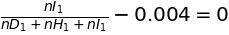

In [105]:
stream1_spec = [
    sym.Eq(nI1/(nI1+nH1+nD1)-0.004)
]
stream2_spec = [
    sym.Eq(nD2, 28.0),
    sym.Eq(nH2, 70.0),
    sym.Eq(nI2, 2.0)
]
reactor_spec = [
    sym.Eq((nH2-nH3)/nH2-0.6)
]
#purge_spec = [
#    sym.Eq(nI6-nI1)
#]

specifications = stream1_spec + stream2_spec + reactor_spec + purge_spec
for eqn in specifications:
    display(eqn)

### Análisis de grados de libertad

In [106]:
print("***************************")
print("*** TABLA DE CORRIENTES ***")
print("***************************")
nVars = 0
nStreams = 1
for s in stream_table:
    print("\nCorriente %d\n"%nStreams)
    nStreams += 1
    for v in s:
        nVars += 1
        print("\tVariable: {:5s}".format(v.name))
print("\n%d Variables en %d corrientes\n" % (nVars, len(stream_table)))

print("***************************")
print("*** TABLA DE REACCIONES ***")
print("***************************")

print("\n%d Avances de Reacción\n" % len(extents))
for v in extents:
    print("\tAvance: ", v.name)
    
print("******************************")
print("*** TABLA DE BIFURCACIONES ***")
print("******************************")

print("\n%d Bifurcaciones\n" % len(split))
for v in split:
    print("\tAvance: ", v.name)


print("\n*****************************")
print("*** Nº TOTAL DE VARIABLES ***")
print("*****************************")
print("\n%d Variables = %d Variables de Corriente + %d Avances de Reacción + %d Bifurcaciones\n" \
    % (len(variables),nVars,len(extents),len(split)))


***************************
*** TABLA DE CORRIENTES ***
***************************

Corriente 1

	Variable: nD1  
	Variable: nH1  
	Variable: nI1  

Corriente 2

	Variable: nD2  
	Variable: nH2  
	Variable: nI2  

Corriente 3

	Variable: nD3  
	Variable: nH3  
	Variable: nI3  
	Variable: nM3  
	Variable: nA3  

Corriente 4

	Variable: nM4  
	Variable: nA4  

Corriente 5

	Variable: nD5  
	Variable: nH5  
	Variable: nI5  

Corriente 6

	Variable: nD6  
	Variable: nH6  
	Variable: nI6  

Corriente 7

	Variable: nD7  
	Variable: nH7  
	Variable: nI7  

22 Variables en 7 corrientes

***************************
*** TABLA DE REACCIONES ***
***************************

1 Avances de Reacción

	Avance:  X
******************************
*** TABLA DE BIFURCACIONES ***
******************************

1 Bifurcaciones

	Avance:  alpha

*****************************
*** Nº TOTAL DE VARIABLES ***
*****************************

24 Variables = 22 Variables de Corriente + 1 Avances de Reacción + 1 Bifur

In [107]:
print("*************************")
print("** Balances de Materia **")
print("*************************")
nEquations=0
nModules=0
equations=[]
for eq in eqns_table:
    nModules+=1
    print("\n Modulo %d\n"%nModules)
    for e in eq:
        nEquations+=1
        print(e)
        equations.append(e)
print("\n %d Ecuaciones en %d Módulos\n"%(nEquations,nModules))        

print("**********************")
print("** Especificaciones **")
print("**********************")
print("\n\n%d Especificaciones\n" % len(specifications))
for spec in specifications:
    print(spec)
    equations.append(spec)

print("\n%d Ecuaciones = %d Balances de Materia + %d Especificaciones" \
    % (len(equations),nEquations,len(specifications)))

*************************
** Balances de Materia **
*************************

 Modulo 1

Eq(-nD1 + nD2 - nD7, 0)
Eq(-nH1 + nH2 - nH7, 0)
Eq(-nI1 + nI2 - nI7, 0)

 Modulo 2

Eq(X - nD2 + nD3, 0)
Eq(3*X - nH2 + nH3, 0)
Eq(-nI2 + nI3, 0)
Eq(-X + nM3, 0)
Eq(-X + nA3, 0)

 Modulo 3

Eq(-nM3 + nM4, 0)
Eq(-nA3 + nA4, 0)
Eq(-nD3 + nD5, 0)
Eq(-nH3 + nH5, 0)
Eq(-nI3 + nI5, 0)

 Modulo 4

Eq(alpha*nD5 - nD6, 0)
Eq(alpha*nH5 - nH6, 0)
Eq(alpha*nI5 - nI6, 0)
Eq(nD5*(1 - alpha) - nD7, 0)
Eq(nH5*(1 - alpha) - nH7, 0)
Eq(nI5*(1 - alpha) - nI7, 0)

 19 Ecuaciones en 4 Módulos

**********************
** Especificaciones **
**********************


5 Especificaciones

Eq(nI1/(nD1 + nH1 + nI1) - 0.004, 0)
Eq(nD2, 28.0)
Eq(nH2, 70.0)
Eq(nI2, 2.0)
Eq(-0.6 + (nH2 - nH3)/nH2, 0)

24 Ecuaciones = 19 Balances de Materia + 5 Especificaciones


### Solución

In [111]:
soln = sym.solve(equations + specifications)[0]

for k in soln.keys():
    print("Variable {0:4s}:  {1:8s}".format(str(k),str(soln[k])))

Variable X   :  14.0000000000000
Variable alpha:  0.122807017543860
Variable nA3 :  14.0000000000000
Variable nA4 :  14.0000000000000
Variable nD1 :  15.7192982456140
Variable nD2 :  28.0000000000000
Variable nD3 :  14.0000000000000
Variable nD5 :  14.0000000000000
Variable nD6 :  1.71929824561404
Variable nD7 :  12.2807017543860
Variable nH1 :  45.4385964912281
Variable nH2 :  70.0000000000000
Variable nH3 :  28.0000000000000
Variable nH5 :  28.0000000000000
Variable nH6 :  3.43859649122807
Variable nH7 :  24.5614035087719
Variable nI1 :  0.245614035087719
Variable nI2 :  2.00000000000000
Variable nI3 :  2.00000000000000
Variable nI5 :  2.00000000000000
Variable nI6 :  0.245614035087719
Variable nI7 :  1.75438596491228
Variable nM3 :  14.0000000000000
Variable nM4 :  14.0000000000000


### Reescalado de la solución


In [138]:
factor=155/soln[nM4]

print("* Alimentación Fresca")
n1=soln[nD1]+soln[nH1]+soln[nI1]
print("Caudal molar %.2f"%(factor*n1))
print("Composición: %8.2f %% CO2 - %8.2f %% H2 - %8.2f %% I"%(soln[nD1]/n1*100,soln[nH1]/n1*100,soln[nI1]/n1*100))

print("* Alimentación del Reactor")
n2=soln[nD2]+soln[nH2]+soln[nI2]
print("Caudal molar %.2f"%(factor*n2))
print("Composición: %8.2f %% CO2 - %8.2f %% H2 - %8.2f %% I"%(soln[nD2]/n2*100,soln[nH2]/n2*100,soln[nI2]/n2*100))

print("* Corriente de Recirculación")
n7=soln[nD7]+soln[nH7]+soln[nI7]
print("Caudal molar %.2f"%(factor*n7))
print("Composición: %8.2f %% CO2 - %8.2f %% H2 - %8.2f %% I"%(soln[nD7]/n7*100,soln[nH7]/n7*100,soln[nI7]/n7*100))

print("* Corriente de Purga")
n6=soln[nD6]+soln[nH6]+soln[nI6]
print("Caudal molar %.2f"%(factor*n6))
print("Composición: %8.2f %% CO2 - %8.2f %% H2 - %8.2f %% I"%(soln[nD6]/n6*100,soln[nH6]/n6*100,soln[nI6]/n6*100))

* Alimentación Fresca
Caudal molar 679.82
Composición:    25.60 % CO2 -    74.00 % H2 -     0.40 % I
* Alimentación del Reactor
Caudal molar 1107.14
Composición:    28.00 % CO2 -    70.00 % H2 -     2.00 % I
* Corriente de Recirculación
Caudal molar 427.32
Composición:    31.82 % CO2 -    63.64 % H2 -     4.55 % I
* Corriente de Purga
Caudal molar 59.82
Composición:    31.82 % CO2 -    63.64 % H2 -     4.55 % I


## Bibliografía - Otros recursos

- R.M. Felder, *Elementary Principles of Chemical Processes*, 3rd Edition, John Wiley & Sons, 2004.
- J. Kantor, *[Introduction to Chemical Engineering Analysis](https://github.com/jckantor/CBE20255)*, curso CBE 20255, Universidad de Notre Dame, Indiana, EE.UU.
- N. de Nevers, *Physical And Chemical Equilibrium For Chemical Engineers*, John Wiley & Sons, 2002. [Repositorio de códigos](https://github.com/FOSSEE/Python-Textbook-Companions/tree/master/Physical_And_Chemical_Equilibrium_For_Chemical_Engineers_by_N._de_Nevers)